In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# creating list of all csv we have 
path_csv = 'csv_stock/'
all_csv = [f for f in listdir(path_csv) if isfile(join(path_csv, f))]
all_csv.sort()
print("We have total",len(all_csv)-1,"csv files")

We have total 5 csv files


In [3]:
# this function loads the csv files and extract 'index' and 'close' column and turn them into numpy array
def get_time_series_list_company_wise(all_csv):
    all_csv_list = list()
    for each_csv in all_csv:
        if each_csv.endswith('.csv'):
            each_csv_list = list()
            print(each_csv)
            data = pd.read_csv('csv_stock/{}'.format(each_csv))
            df_time = data[['index']]
            df_series = data[['Close']]
            time = df_time.to_numpy()
            series = df_series.to_numpy()
            each_csv_list.append(time)
            each_csv_list.append(series)
            print(len(each_csv_list))
            all_csv_list.append(each_csv_list)
    return all_csv_list

In [4]:
list_ts = get_time_series_list_company_wise(all_csv) 

aapl.csv
2
amzn.csv
2
fb.csv
2
googl.csv
2
msft.csv
2


In [5]:
time = list_ts[0][0]
series = list_ts[0][1]

print(series.shape)

(8364, 1)


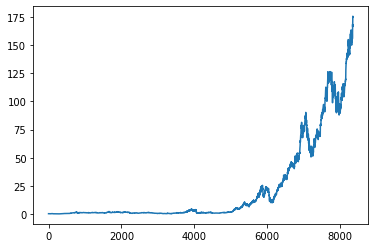

In [6]:
plt.plot(time,series)

In [7]:
# split into training and validation
split = 7390
time_train = time[4000:split]
time_val = time[split:]
series_train = series[4000:split]
series_val = series[split:]

print("Time Train: ", time_train.shape)
print("Series Train: ", series_train.shape)
print("Time Validation: ", time_val.shape)
print("Series Validation: ", series_val.shape)

Time Train:  (3390, 1)
Series Train:  (3390, 1)
Time Validation:  (974, 1)
Series Validation:  (974, 1)


In [8]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000



def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [9]:
# finding the best Learning Rate (lr)

# tf.keras.backend.clear_session()
# tf.random.set_seed(51)
# np.random.seed(51)

# tf.keras.backend.clear_session()
# dataset = windowed_dataset(series_train, window_size, batch_size, shuffle_buffer_size)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

# history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

In [10]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-8, 1e-4, 0, 30])

In [12]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
tf.keras.backend.clear_session()


shuffle_buffer_size = 1000

dataset = windowed_dataset(series_train, window_size = 37, batch_size =58, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, return_sequences=True)),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30, return_sequences=True)),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 200.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9),metrics=["mae"])

history = model.fit(dataset,epochs=160)

Epoch 1/160
105/105 [==============================] - 6s 59ms/step - loss: 209.1862 - mae: 11.2831
Epoch 2/160
105/105 [==============================] - 6s 61ms/step - loss: 61.7741 - mae: 5.3117
Epoch 3/160
105/105 [==============================] - 6s 60ms/step - loss: 27.9777 - mae: 3.5576
Epoch 4/160
105/105 [==============================] - 7s 63ms/step - loss: 18.5084 - mae: 2.7497
Epoch 5/160
105/105 [==============================] - 7s 64ms/step - loss: 14.0771 - mae: 2.4180
Epoch 6/160
105/105 [==============================] - 7s 66ms/step - loss: 10.8051 - mae: 2.0926
Epoch 7/160
105/105 [==============================] - 7s 65ms/step - loss: 8.3926 - mae: 1.8349
Epoch 8/160
105/105 [==============================] - 7s 67ms/step - loss: 6.8616 - mae: 1.6265
Epoch 9/160
105/105 [==============================] - 7s 67ms/step - loss: 5.8377 - mae: 1.4967
Epoch 10/160
105/105 [==============================] - 7s 68ms/step - loss: 5.1203 - mae: 1.3985
Epoch 11/160
105/105 

105/105 [==============================] - 7s 64ms/step - loss: 2.4824 - mae: 0.9235
Epoch 85/160
105/105 [==============================] - 7s 64ms/step - loss: 2.5427 - mae: 0.9342
Epoch 86/160
105/105 [==============================] - 6s 60ms/step - loss: 2.4343 - mae: 0.9110
Epoch 87/160
105/105 [==============================] - 7s 64ms/step - loss: 2.4947 - mae: 0.9234
Epoch 88/160
105/105 [==============================] - 7s 63ms/step - loss: 2.5227 - mae: 0.9457
Epoch 89/160
105/105 [==============================] - 7s 63ms/step - loss: 2.5207 - mae: 0.9456
Epoch 90/160
105/105 [==============================] - 6s 61ms/step - loss: 2.4458 - mae: 0.9131
Epoch 91/160
105/105 [==============================] - 7s 62ms/step - loss: 2.4337 - mae: 0.9152
Epoch 92/160
105/105 [==============================] - 6s 60ms/step - loss: 2.4181 - mae: 0.9029
Epoch 93/160
105/105 [==============================] - 6s 61ms/step - loss: 2.3723 - mae: 0.9027
Epoch 94/160
105/105 [===========

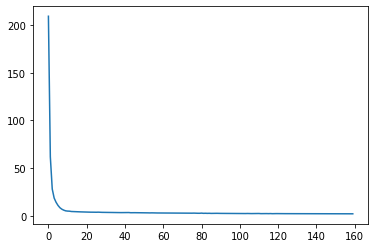

In [15]:
loss=history.history['loss']
epochs=range(len(loss))


loss_zoom = loss[100:]
epochs_zoom = epochs[100:]

plt.plot(epochs,loss)

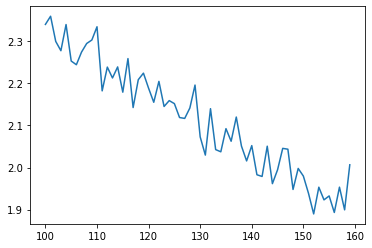

In [16]:
plt.plot(epochs_zoom,loss_zoom)

In [17]:
forecast = []
results = []
for time in range(len(series) - window_size):
    print(time, time + window_size)
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast_val = forecast[split-window_size:]
results_val = np.array(forecast_val)[:, 0, 0]

0 20
1 21
2 22
3 23
4 24
5 25
6 26
7 27
8 28
9 29
10 30
11 31
12 32
13 33
14 34
15 35
16 36
17 37
18 38
19 39
20 40
21 41
22 42
23 43
24 44
25 45
26 46
27 47
28 48
29 49
30 50
31 51
32 52
33 53
34 54
35 55
36 56
37 57
38 58
39 59
40 60
41 61
42 62
43 63
44 64
45 65
46 66
47 67
48 68
49 69
50 70
51 71
52 72
53 73
54 74
55 75
56 76
57 77
58 78
59 79
60 80
61 81
62 82
63 83
64 84
65 85
66 86
67 87
68 88
69 89
70 90
71 91
72 92
73 93
74 94
75 95
76 96
77 97
78 98
79 99
80 100
81 101
82 102
83 103
84 104
85 105
86 106
87 107
88 108
89 109
90 110
91 111
92 112
93 113
94 114
95 115
96 116
97 117
98 118
99 119
100 120
101 121
102 122
103 123
104 124
105 125
106 126
107 127
108 128
109 129
110 130
111 131
112 132
113 133
114 134
115 135
116 136
117 137
118 138
119 139
120 140
121 141
122 142
123 143
124 144
125 145
126 146
127 147
128 148
129 149
130 150
131 151
132 152
133 153
134 154
135 155
136 156
137 157
138 158
139 159
140 160
141 161
142 162
143 163
144 164
145 165
146 166
147 167
148 16

1037 1057
1038 1058
1039 1059
1040 1060
1041 1061
1042 1062
1043 1063
1044 1064
1045 1065
1046 1066
1047 1067
1048 1068
1049 1069
1050 1070
1051 1071
1052 1072
1053 1073
1054 1074
1055 1075
1056 1076
1057 1077
1058 1078
1059 1079
1060 1080
1061 1081
1062 1082
1063 1083
1064 1084
1065 1085
1066 1086
1067 1087
1068 1088
1069 1089
1070 1090
1071 1091
1072 1092
1073 1093
1074 1094
1075 1095
1076 1096
1077 1097
1078 1098
1079 1099
1080 1100
1081 1101
1082 1102
1083 1103
1084 1104
1085 1105
1086 1106
1087 1107
1088 1108
1089 1109
1090 1110
1091 1111
1092 1112
1093 1113
1094 1114
1095 1115
1096 1116
1097 1117
1098 1118
1099 1119
1100 1120
1101 1121
1102 1122
1103 1123
1104 1124
1105 1125
1106 1126
1107 1127
1108 1128
1109 1129
1110 1130
1111 1131
1112 1132
1113 1133
1114 1134
1115 1135
1116 1136
1117 1137
1118 1138
1119 1139
1120 1140
1121 1141
1122 1142
1123 1143
1124 1144
1125 1145
1126 1146
1127 1147
1128 1148
1129 1149
1130 1150
1131 1151
1132 1152
1133 1153
1134 1154
1135 1155
1136 1156


1857 1877
1858 1878
1859 1879
1860 1880
1861 1881
1862 1882
1863 1883
1864 1884
1865 1885
1866 1886
1867 1887
1868 1888
1869 1889
1870 1890
1871 1891
1872 1892
1873 1893
1874 1894
1875 1895
1876 1896
1877 1897
1878 1898
1879 1899
1880 1900
1881 1901
1882 1902
1883 1903
1884 1904
1885 1905
1886 1906
1887 1907
1888 1908
1889 1909
1890 1910
1891 1911
1892 1912
1893 1913
1894 1914
1895 1915
1896 1916
1897 1917
1898 1918
1899 1919
1900 1920
1901 1921
1902 1922
1903 1923
1904 1924
1905 1925
1906 1926
1907 1927
1908 1928
1909 1929
1910 1930
1911 1931
1912 1932
1913 1933
1914 1934
1915 1935
1916 1936
1917 1937
1918 1938
1919 1939
1920 1940
1921 1941
1922 1942
1923 1943
1924 1944
1925 1945
1926 1946
1927 1947
1928 1948
1929 1949
1930 1950
1931 1951
1932 1952
1933 1953
1934 1954
1935 1955
1936 1956
1937 1957
1938 1958
1939 1959
1940 1960
1941 1961
1942 1962
1943 1963
1944 1964
1945 1965
1946 1966
1947 1967
1948 1968
1949 1969
1950 1970
1951 1971
1952 1972
1953 1973
1954 1974
1955 1975
1956 1976


2677 2697
2678 2698
2679 2699
2680 2700
2681 2701
2682 2702
2683 2703
2684 2704
2685 2705
2686 2706
2687 2707
2688 2708
2689 2709
2690 2710
2691 2711
2692 2712
2693 2713
2694 2714
2695 2715
2696 2716
2697 2717
2698 2718
2699 2719
2700 2720
2701 2721
2702 2722
2703 2723
2704 2724
2705 2725
2706 2726
2707 2727
2708 2728
2709 2729
2710 2730
2711 2731
2712 2732
2713 2733
2714 2734
2715 2735
2716 2736
2717 2737
2718 2738
2719 2739
2720 2740
2721 2741
2722 2742
2723 2743
2724 2744
2725 2745
2726 2746
2727 2747
2728 2748
2729 2749
2730 2750
2731 2751
2732 2752
2733 2753
2734 2754
2735 2755
2736 2756
2737 2757
2738 2758
2739 2759
2740 2760
2741 2761
2742 2762
2743 2763
2744 2764
2745 2765
2746 2766
2747 2767
2748 2768
2749 2769
2750 2770
2751 2771
2752 2772
2753 2773
2754 2774
2755 2775
2756 2776
2757 2777
2758 2778
2759 2779
2760 2780
2761 2781
2762 2782
2763 2783
2764 2784
2765 2785
2766 2786
2767 2787
2768 2788
2769 2789
2770 2790
2771 2791
2772 2792
2773 2793
2774 2794
2775 2795
2776 2796


3500 3520
3501 3521
3502 3522
3503 3523
3504 3524
3505 3525
3506 3526
3507 3527
3508 3528
3509 3529
3510 3530
3511 3531
3512 3532
3513 3533
3514 3534
3515 3535
3516 3536
3517 3537
3518 3538
3519 3539
3520 3540
3521 3541
3522 3542
3523 3543
3524 3544
3525 3545
3526 3546
3527 3547
3528 3548
3529 3549
3530 3550
3531 3551
3532 3552
3533 3553
3534 3554
3535 3555
3536 3556
3537 3557
3538 3558
3539 3559
3540 3560
3541 3561
3542 3562
3543 3563
3544 3564
3545 3565
3546 3566
3547 3567
3548 3568
3549 3569
3550 3570
3551 3571
3552 3572
3553 3573
3554 3574
3555 3575
3556 3576
3557 3577
3558 3578
3559 3579
3560 3580
3561 3581
3562 3582
3563 3583
3564 3584
3565 3585
3566 3586
3567 3587
3568 3588
3569 3589
3570 3590
3571 3591
3572 3592
3573 3593
3574 3594
3575 3595
3576 3596
3577 3597
3578 3598
3579 3599
3580 3600
3581 3601
3582 3602
3583 3603
3584 3604
3585 3605
3586 3606
3587 3607
3588 3608
3589 3609
3590 3610
3591 3611
3592 3612
3593 3613
3594 3614
3595 3615
3596 3616
3597 3617
3598 3618
3599 3619


4325 4345
4326 4346
4327 4347
4328 4348
4329 4349
4330 4350
4331 4351
4332 4352
4333 4353
4334 4354
4335 4355
4336 4356
4337 4357
4338 4358
4339 4359
4340 4360
4341 4361
4342 4362
4343 4363
4344 4364
4345 4365
4346 4366
4347 4367
4348 4368
4349 4369
4350 4370
4351 4371
4352 4372
4353 4373
4354 4374
4355 4375
4356 4376
4357 4377
4358 4378
4359 4379
4360 4380
4361 4381
4362 4382
4363 4383
4364 4384
4365 4385
4366 4386
4367 4387
4368 4388
4369 4389
4370 4390
4371 4391
4372 4392
4373 4393
4374 4394
4375 4395
4376 4396
4377 4397
4378 4398
4379 4399
4380 4400
4381 4401
4382 4402
4383 4403
4384 4404
4385 4405
4386 4406
4387 4407
4388 4408
4389 4409
4390 4410
4391 4411
4392 4412
4393 4413
4394 4414
4395 4415
4396 4416
4397 4417
4398 4418
4399 4419
4400 4420
4401 4421
4402 4422
4403 4423
4404 4424
4405 4425
4406 4426
4407 4427
4408 4428
4409 4429
4410 4430
4411 4431
4412 4432
4413 4433
4414 4434
4415 4435
4416 4436
4417 4437
4418 4438
4419 4439
4420 4440
4421 4441
4422 4442
4423 4443
4424 4444


5146 5166
5147 5167
5148 5168
5149 5169
5150 5170
5151 5171
5152 5172
5153 5173
5154 5174
5155 5175
5156 5176
5157 5177
5158 5178
5159 5179
5160 5180
5161 5181
5162 5182
5163 5183
5164 5184
5165 5185
5166 5186
5167 5187
5168 5188
5169 5189
5170 5190
5171 5191
5172 5192
5173 5193
5174 5194
5175 5195
5176 5196
5177 5197
5178 5198
5179 5199
5180 5200
5181 5201
5182 5202
5183 5203
5184 5204
5185 5205
5186 5206
5187 5207
5188 5208
5189 5209
5190 5210
5191 5211
5192 5212
5193 5213
5194 5214
5195 5215
5196 5216
5197 5217
5198 5218
5199 5219
5200 5220
5201 5221
5202 5222
5203 5223
5204 5224
5205 5225
5206 5226
5207 5227
5208 5228
5209 5229
5210 5230
5211 5231
5212 5232
5213 5233
5214 5234
5215 5235
5216 5236
5217 5237
5218 5238
5219 5239
5220 5240
5221 5241
5222 5242
5223 5243
5224 5244
5225 5245
5226 5246
5227 5247
5228 5248
5229 5249
5230 5250
5231 5251
5232 5252
5233 5253
5234 5254
5235 5255
5236 5256
5237 5257
5238 5258
5239 5259
5240 5260
5241 5261
5242 5262
5243 5263
5244 5264
5245 5265


5966 5986
5967 5987
5968 5988
5969 5989
5970 5990
5971 5991
5972 5992
5973 5993
5974 5994
5975 5995
5976 5996
5977 5997
5978 5998
5979 5999
5980 6000
5981 6001
5982 6002
5983 6003
5984 6004
5985 6005
5986 6006
5987 6007
5988 6008
5989 6009
5990 6010
5991 6011
5992 6012
5993 6013
5994 6014
5995 6015
5996 6016
5997 6017
5998 6018
5999 6019
6000 6020
6001 6021
6002 6022
6003 6023
6004 6024
6005 6025
6006 6026
6007 6027
6008 6028
6009 6029
6010 6030
6011 6031
6012 6032
6013 6033
6014 6034
6015 6035
6016 6036
6017 6037
6018 6038
6019 6039
6020 6040
6021 6041
6022 6042
6023 6043
6024 6044
6025 6045
6026 6046
6027 6047
6028 6048
6029 6049
6030 6050
6031 6051
6032 6052
6033 6053
6034 6054
6035 6055
6036 6056
6037 6057
6038 6058
6039 6059
6040 6060
6041 6061
6042 6062
6043 6063
6044 6064
6045 6065
6046 6066
6047 6067
6048 6068
6049 6069
6050 6070
6051 6071
6052 6072
6053 6073
6054 6074
6055 6075
6056 6076
6057 6077
6058 6078
6059 6079
6060 6080
6061 6081
6062 6082
6063 6083
6064 6084
6065 6085


6786 6806
6787 6807
6788 6808
6789 6809
6790 6810
6791 6811
6792 6812
6793 6813
6794 6814
6795 6815
6796 6816
6797 6817
6798 6818
6799 6819
6800 6820
6801 6821
6802 6822
6803 6823
6804 6824
6805 6825
6806 6826
6807 6827
6808 6828
6809 6829
6810 6830
6811 6831
6812 6832
6813 6833
6814 6834
6815 6835
6816 6836
6817 6837
6818 6838
6819 6839
6820 6840
6821 6841
6822 6842
6823 6843
6824 6844
6825 6845
6826 6846
6827 6847
6828 6848
6829 6849
6830 6850
6831 6851
6832 6852
6833 6853
6834 6854
6835 6855
6836 6856
6837 6857
6838 6858
6839 6859
6840 6860
6841 6861
6842 6862
6843 6863
6844 6864
6845 6865
6846 6866
6847 6867
6848 6868
6849 6869
6850 6870
6851 6871
6852 6872
6853 6873
6854 6874
6855 6875
6856 6876
6857 6877
6858 6878
6859 6879
6860 6880
6861 6881
6862 6882
6863 6883
6864 6884
6865 6885
6866 6886
6867 6887
6868 6888
6869 6889
6870 6890
6871 6891
6872 6892
6873 6893
6874 6894
6875 6895
6876 6896
6877 6897
6878 6898
6879 6899
6880 6900
6881 6901
6882 6902
6883 6903
6884 6904
6885 6905


7608 7628
7609 7629
7610 7630
7611 7631
7612 7632
7613 7633
7614 7634
7615 7635
7616 7636
7617 7637
7618 7638
7619 7639
7620 7640
7621 7641
7622 7642
7623 7643
7624 7644
7625 7645
7626 7646
7627 7647
7628 7648
7629 7649
7630 7650
7631 7651
7632 7652
7633 7653
7634 7654
7635 7655
7636 7656
7637 7657
7638 7658
7639 7659
7640 7660
7641 7661
7642 7662
7643 7663
7644 7664
7645 7665
7646 7666
7647 7667
7648 7668
7649 7669
7650 7670
7651 7671
7652 7672
7653 7673
7654 7674
7655 7675
7656 7676
7657 7677
7658 7678
7659 7679
7660 7680
7661 7681
7662 7682
7663 7683
7664 7684
7665 7685
7666 7686
7667 7687
7668 7688
7669 7689
7670 7690
7671 7691
7672 7692
7673 7693
7674 7694
7675 7695
7676 7696
7677 7697
7678 7698
7679 7699
7680 7700
7681 7701
7682 7702
7683 7703
7684 7704
7685 7705
7686 7706
7687 7707
7688 7708
7689 7709
7690 7710
7691 7711
7692 7712
7693 7713
7694 7714
7695 7715
7696 7716
7697 7717
7698 7718
7699 7719
7700 7720
7701 7721
7702 7722
7703 7723
7704 7724
7705 7725
7706 7726
7707 7727


In [18]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [19]:
forecast_train = forecast[4000:split]
results_train = np.array(forecast_train)[:, 0, 0]

print(len(forecast))
print(len(forecast_val))
print(len(forecast_train))
print(results_train.shape)

8344
974
3390
(3390,)


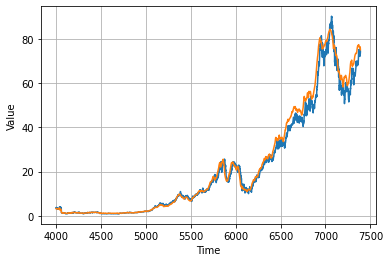

In [20]:
plot_series(time_train, series_train)
plot_series(time_train, results_train)

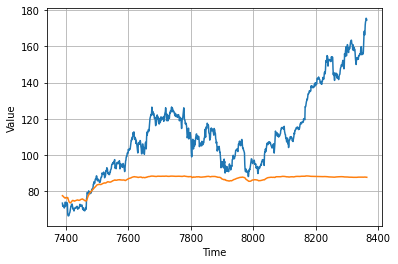

In [21]:
# plt.figure(figsize=(10, 6))
plot_series(time_val, series_val)
plot_series(time_val, results_val)